In [1]:
# I imported libraries and read CSV files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
normal_season = pd.read_csv("Files/Normalseason.csv", encoding="Latin1", sep=";")
playoffs_season = pd.read_csv("Files/Playoffs.csv", encoding="Latin1", sep=";")
normal_season.info()
normal_season.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,0.4,1.3,0.268,2.8,5.0,0.562,0.529,0.9,1.5,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,0.525,0.3,1.0,0.260,2.9,5.1,0.578,0.547,0.9,1.4,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,0.8,2.7,0.294,1.5,2.8,0.523,0.483,0.5,0.7,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,0.426,0.9,2.8,0.331,1.2,2.1,0.551,0.520,0.3,0.4,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,0.391,0.6,2.6,0.217,2.1,4.3,0.496,0.432,0.8,1.3,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
9,6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,2.7,5.9,0.461,1.8,3.2,0.570,0.649,1.7,2.0,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5


In [2]:
"""
In this table, there is a problem about player teams number in total. In NBA, there is no rule about how many times you can switch a team. But practically, players changing teams 2 times as most and that means each player can plays for 3 different teams in a season.
But in this database, I'm gonna count players last two team when I'm calculating their EFF (players efficiency). Because at the top of the database, "Precious Achiuwa" for example, has 3 rows. That means 3 teams in season and that's possible. But when you look G (game) and GS (game started), given that there is a 82 game in normal season, this player played 74, 25 and 49 matches so thats not possible.
I assume that every player who has a 3 rows, contains their last season statistics into this database. So that's why I deleted first rows who has 3 rows in this database and grouped other rows in their last teams.
"""
grouped_by_rk = normal_season.groupby("Rk")
after_row_delete = grouped_by_rk.apply(lambda x: x.iloc[1:] if len(x) > 1 else x)
normal_season = after_row_delete.reset_index(drop=True)
normal_season.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
1,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,0.525,0.3,1.0,0.260,2.9,5.1,0.578,0.547,0.9,1.4,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
2,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,0.2,0.6,0.357,7.3,13.7,0.528,0.529,4.1,5.5,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
3,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,0.426,0.9,2.8,0.331,1.2,2.1,0.551,0.520,0.3,0.4,0.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
4,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,0.391,0.6,2.6,0.217,2.1,4.3,0.496,0.432,0.8,1.3,0.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
5,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,1.7,5.0,0.349,2.3,4.3,0.534,0.528,0.9,1.4,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
6,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,1.6,4.1,0.391,1.3,2.5,0.517,0.560,0.6,0.8,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
7,6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,0.499,2.7,5.9,0.461,1.8,3.2,0.570,0.649,1.7,2.0,0.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5
8,7,Jarrett Allen,C,25,CLE,77,77,31.7,6.7,10.6,0.634,0.0,0.1,0.000,6.7,10.6,0.638,0.634,3.0,4.1,0.742,3.2,7.4,10.5,2.7,0.7,1.1,1.6,1.9,16.5
9,8,Timmy Allen,SF,24,MEM,5,0,25.0,1.2,4.6,0.261,0.0,1.4,0.000,1.2,3.2,0.375,0.261,0.2,0.4,0.500,0.8,2.6,3.4,1.0,0.8,0.0,0.4,3.6,2.6


In [3]:
# Grouped players by name and last teams
players_last_teams = normal_season.groupby("Player").agg({"Tm": "last"}).reset_index()
players_last_teams.head(10)

,Player,Tm
0,A.J. Green,MIL
1,A.J. Lawson,DAL
2,AJ Griffin,ATL
3,Aaron Gordon,DEN
4,Aaron Holiday,HOU
5,Aaron Nesmith,IND
6,Aaron Wiggins,OKC
7,Adam Flagler,OKC
8,Adama Sanogo,CHI
9,Admiral Schofield,ORL


In [4]:
# I needed to filter players who played in normal season and playoffs. But when doing it, I needed to filter columns by needed to groupby with mean and sum. Only G and GS needed to summarize.
numeric_columns = normal_season.select_dtypes(include="number").columns
sum_columns = ["G", "GS"]
mean_columns = normal_season.columns[8:]

grouped_sum = normal_season.groupby("Player")[sum_columns].sum()
grouped_mean = normal_season.groupby("Player")[mean_columns].mean()
edited_normal_season = pd.concat([grouped_sum, grouped_mean], axis=1).reset_index().round(2)

# Merged players last teams with edited normal season
edited_normal_season = pd.merge(edited_normal_season, players_last_teams, on="Player")
edited_normal_season.head(10)

,Player,G,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Tm
0,A.J. Green,56,0,1.5,3.5,0.42,1.2,3.0,0.41,0.3,0.5,0.52,0.60,0.3,0.3,0.90,0.2,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5,MIL
1,A.J. Lawson,42,0,1.3,2.9,0.45,0.3,1.2,0.26,1.0,1.7,0.58,0.50,0.4,0.5,0.65,0.3,0.9,1.2,0.5,0.2,0.1,0.3,0.5,3.2,DAL
2,AJ Griffin,20,0,0.9,3.1,0.29,0.5,2.0,0.26,0.4,1.2,0.35,0.37,0.1,0.1,1.00,0.1,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4,ATL
3,Aaron Gordon,73,73,5.5,9.8,0.56,0.5,1.9,0.29,4.9,7.9,0.62,0.58,2.4,3.7,0.66,2.4,4.1,6.5,3.5,0.8,0.6,1.4,1.9,13.9,DEN
4,Aaron Holiday,78,1,2.4,5.3,0.45,1.1,2.8,0.39,1.3,2.6,0.51,0.55,0.7,0.8,0.92,0.3,1.3,1.6,1.8,0.5,0.1,0.7,1.6,6.6,HOU
5,Aaron Nesmith,72,47,4.4,8.8,0.50,1.9,4.6,0.42,2.4,4.2,0.58,0.61,1.5,1.9,0.78,0.9,2.9,3.8,1.5,0.9,0.7,0.9,3.3,12.2,IND
6,Aaron Wiggins,78,4,2.7,4.8,0.56,0.8,1.6,0.49,1.9,3.2,0.60,0.64,0.7,0.9,0.79,0.8,1.6,2.4,1.1,0.7,0.2,0.7,1.2,6.9,OKC
7,Adam Flagler,2,0,0.5,3.5,0.14,0.5,3.0,0.17,0.0,0.5,0.00,0.21,0.0,0.0,0.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.5,OKC
8,Adama Sanogo,9,0,1.6,3.0,0.52,0.0,0.0,0.00,1.6,3.0,0.52,0.52,0.9,1.3,0.67,2.1,1.9,4.0,0.0,0.1,0.0,0.6,0.6,4.0,CHI
9,Admiral Schofield,23,0,0.4,1.1,0.38,0.3,0.7,0.38,0.2,0.4,0.40,0.50,0.0,0.1,0.00,0.1,0.6,0.7,0.3,0.0,0.0,0.2,0.4,1.1,ORL


In [5]:
# Did the same thing for playoffs data
grouped_sum = playoffs_season.groupby("Player")[sum_columns].sum()
grouped_mean = playoffs_season.groupby("Player")[mean_columns].mean()
edited_playoffs_season = pd.concat([grouped_sum, grouped_mean], axis=1).reset_index()
edited_playoffs_season = edited_playoffs_season.round(2)

# Merged players last teams with playoffs
edited_playoffs_season = pd.merge(edited_playoffs_season, players_last_teams, on="Player")
edited_playoffs_season.head(10)

,Player,G,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Tm
0,A.J. Green,6,0,1.0,2.7,0.38,0.3,1.8,0.18,0.7,0.8,0.80,0.44,0.5,0.5,1.00,0.0,1.5,1.5,0.3,0.0,0.0,0.2,1.5,2.8,MIL
1,A.J. Lawson,7,0,0.4,0.9,0.50,0.3,0.7,0.40,0.1,0.1,1.00,0.67,0.0,0.0,0.00,0.1,0.3,0.4,0.0,0.0,0.1,0.0,0.1,1.1,DAL
2,Aaron Gordon,12,12,5.8,9.8,0.58,0.9,2.3,0.41,4.8,7.6,0.64,0.63,1.9,2.3,0.82,3.0,4.3,7.3,4.4,0.8,0.6,1.5,2.3,14.3,DEN
3,Aaron Nesmith,14,14,3.7,8.5,0.44,1.4,4.9,0.29,2.3,3.6,0.63,0.52,1.9,2.1,0.93,1.3,3.7,5.0,2.2,0.6,0.6,1.4,4.0,10.8,IND
4,Aaron Wiggins,10,0,2.3,4.7,0.49,0.6,2.0,0.30,1.7,2.7,0.63,0.55,1.0,1.1,0.91,0.9,2.3,3.2,1.0,0.6,0.3,0.9,0.8,6.2,OKC
5,Al Horford,11,7,3.6,8.1,0.45,1.7,5.6,0.31,1.9,2.5,0.78,0.56,0.4,0.6,0.57,1.9,5.3,7.2,2.0,0.5,0.8,0.6,1.4,9.4,BOS
6,Alec Burks,6,0,4.2,8.3,0.50,2.0,4.7,0.43,2.2,3.7,0.59,0.62,4.5,5.3,0.84,0.7,2.7,3.3,1.0,0.2,0.2,0.0,1.0,14.8,NYK
7,Amir Coffey,6,3,1.2,3.7,0.32,0.5,1.8,0.27,0.7,1.8,0.36,0.39,0.0,0.0,0.00,0.3,1.3,1.7,0.3,0.3,0.2,0.8,1.0,2.8,LAC
8,Andre Jackson Jr.,5,0,1.0,2.2,0.46,0.4,1.2,0.33,0.6,1.0,0.60,0.55,0.0,0.0,0.00,1.0,1.2,2.2,2.0,1.0,0.2,0.6,2.0,2.4,MIL
9,Andrew Nembhard,14,14,5.3,9.4,0.56,1.5,3.1,0.49,3.8,6.3,0.60,0.64,0.9,1.2,0.71,0.8,2.4,3.1,5.0,0.3,0.2,1.2,3.4,12.9,IND


In [6]:
# For now, to finish first research of my project, I need to calculate players EFF for normal season. Later, I'm gonna compare playoffs EFF between normal season EFF. But for now I'm gonna continue with only normal season.
edited_normal_season["EFF"] = (edited_normal_season["PTS"] + edited_normal_season["TRB"] + edited_normal_season["AST"] + edited_normal_season["STL"] + edited_normal_season["BLK"]) - (edited_normal_season["FGA"] - edited_normal_season["FG"] + edited_normal_season["FTA"] - edited_normal_season["FT"] + edited_normal_season["TOV"] + edited_normal_season["PF"])
eff_n = edited_normal_season[["Player", "EFF", "Tm"]].sort_values(by="EFF", ascending=False)
eff_n

,Player,EFF,Tm
434,Nikola Joki?,36.1,DEN
284,Joel Embiid,35.8,PHI
373,Luka Don?i?,34.7,DAL
184,Giannis Antetokounmpo,33.4,MIL
28,Anthony Davis,31.1,LAL
...,...,...,...
16,Alondes Williams,-0.5,MIA
309,Joshua Primo,-1.0,LAC
481,Ron Harper Jr.,-1.0,TOR
234,Jalen Crutcher,-1.0,NOP


In [7]:
# I think best way to group them by EFF is using IQR on some point. eff_n.mean = 8.36 | mode = 3 | max = 36,1 | min = -3
# So I'm gonna calculate IQR and then check that which labels would be fit for this. (data < q1 - 1.5 * IQR | data > q3 + 1.5 * IQR)
from scipy.stats import iqr
iqr_value = iqr(eff_n["EFF"])
lower_treshold = np.quantile(eff_n["EFF"], 0.25) - 1.5 * iqr_value
upper_treshold = np.quantile(eff_n["EFF"], 0.75) + 1.5 * iqr_value
between = (eff_n["EFF"] < lower_treshold) | (eff_n["EFF"] > upper_treshold)
eff_n[between]

# +25 EFF is so rare as I see. So I'm gonna set labels from 10 by 5.
bins = [5, 10, 15, 20, 25, 30, np.inf]
labels = ["5-10", "10-15", "15-20", "20-25", "25-30", "30+"]
eff_n["Category"] = pd.cut(eff_n["EFF"], labels=labels, bins=bins)
eff_n = eff_n[eff_n["Category"].notnull()]
eff_n

,Player,EFF,Tm,Category
434,Nikola Joki?,36.10,DEN,30+
284,Joel Embiid,35.80,PHI,30+
373,Luka Don?i?,34.70,DAL,30+
184,Giannis Antetokounmpo,33.40,MIL,30+
28,Anthony Davis,31.10,LAL,30+
...,...,...,...,...
288,Johnny Juzang,5.20,UTA,5-10
41,Bismack Biyombo,5.15,OKC,5-10
263,Jaxson Hayes,5.10,LAL,5-10
8,Adama Sanogo,5.10,CHI,5-10


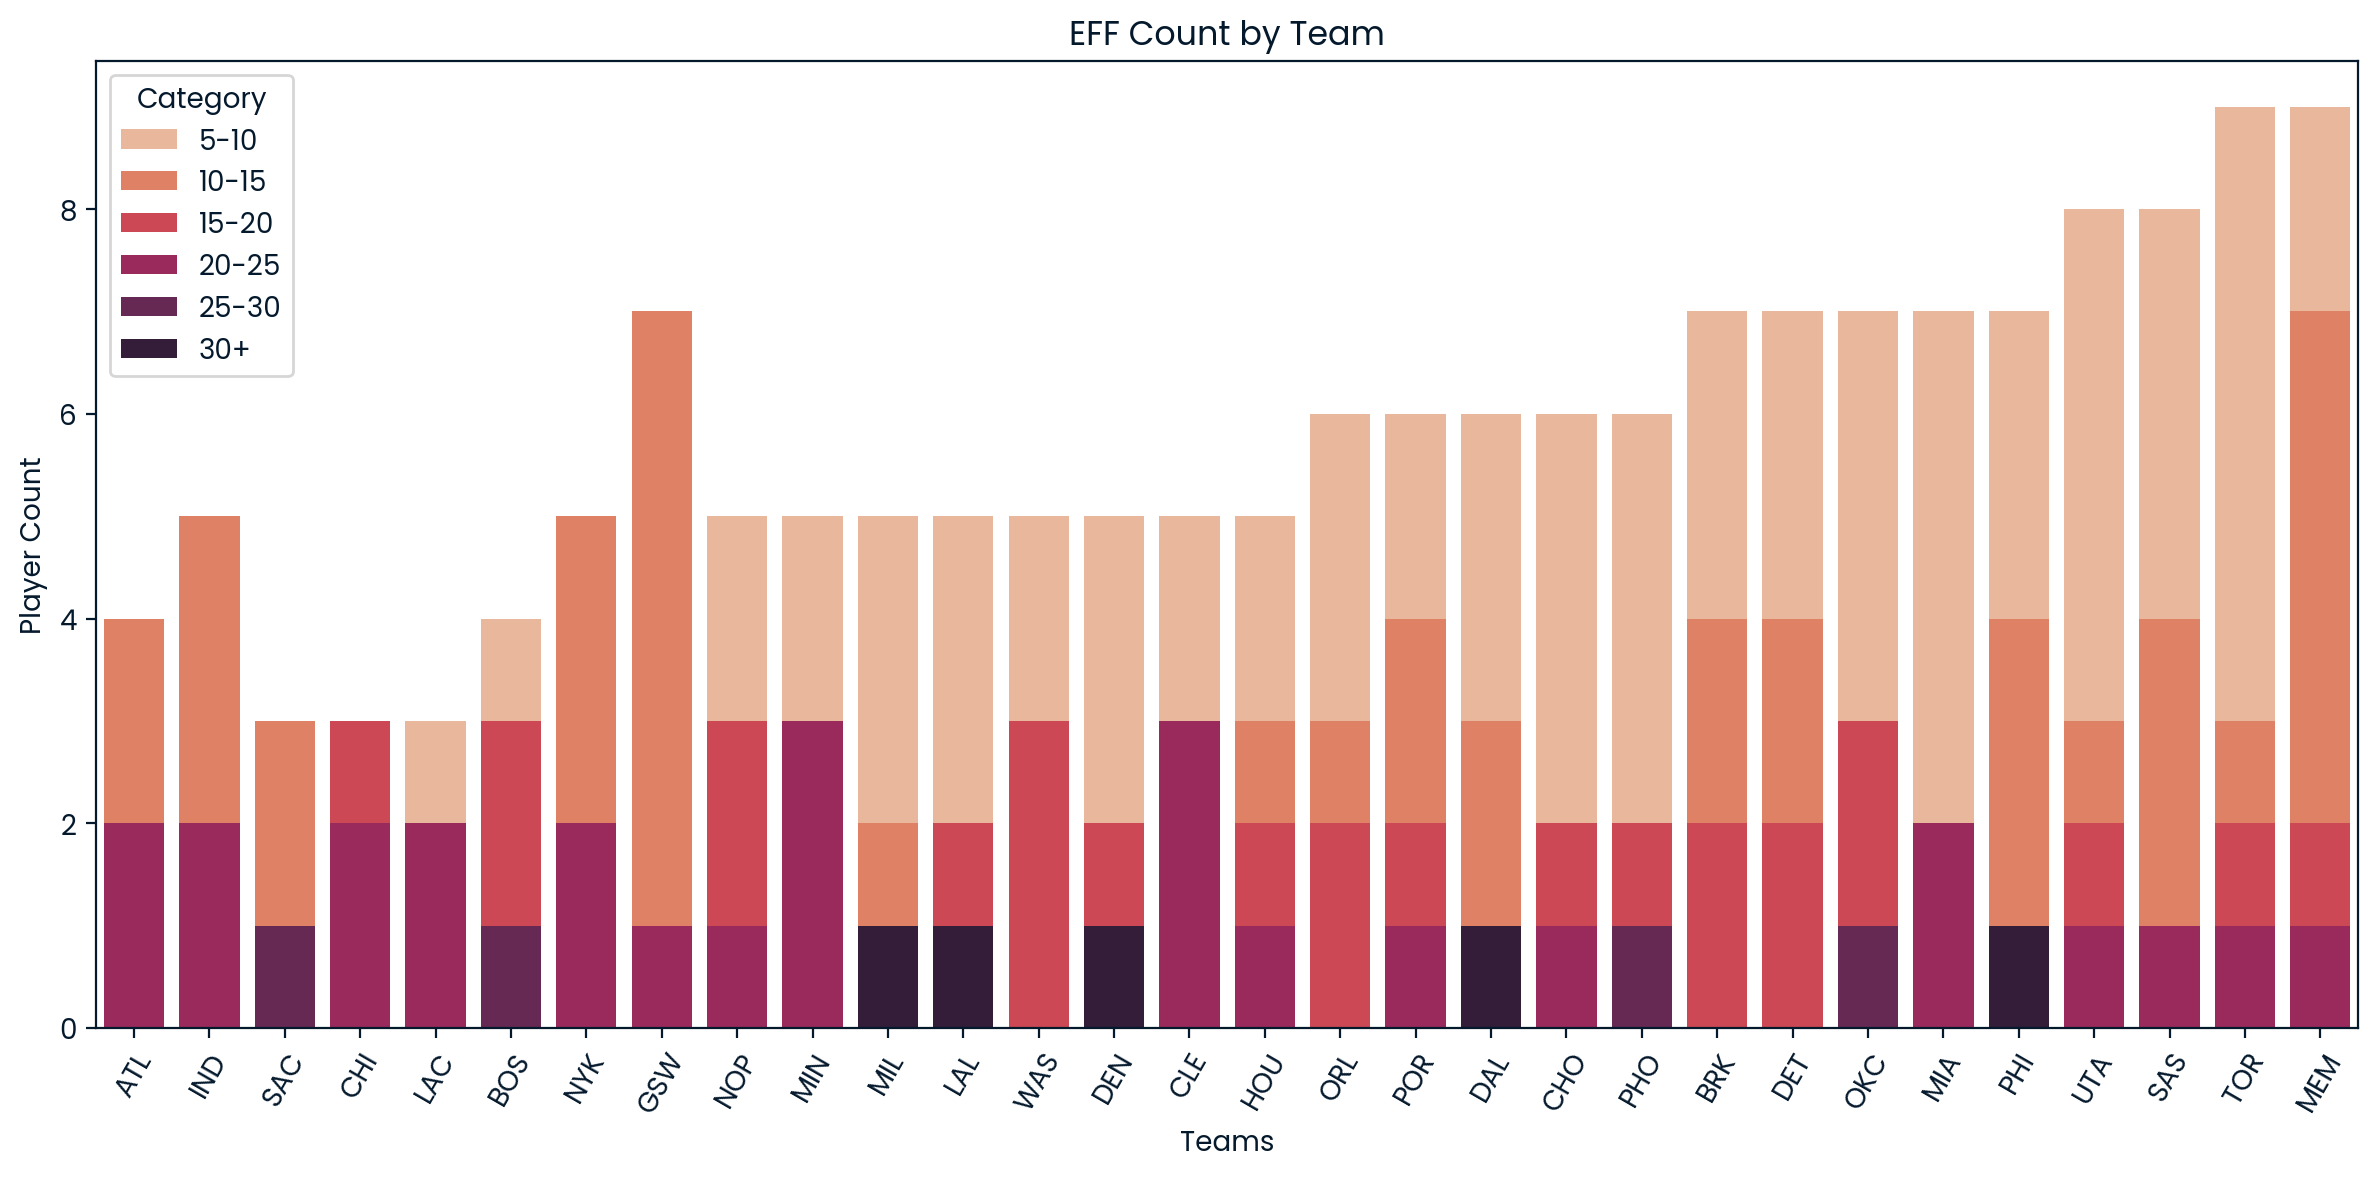

In [8]:
# Time to see player distribution by team
team_order = eff_n[eff_n["Category"] == "5-10"].groupby("Tm").size().sort_values(ascending=True).index
palette = sns.color_palette("rocket")[::-1]

plt.figure(figsize=(12, 6))
sns.countplot(data=eff_n, x="Tm", hue="Category", dodge=False, order=team_order, palette=palette)

plt.xlabel("Teams")
plt.ylabel("Player Count")
plt.title("EFF Count by Team")

plt.xticks(rotation=60)
plt.tight_layout()

In [9]:
eff_n.groupby("Tm")["Category"].value_counts().sort_index(level="Tm")

Tm   Category
ATL  5-10        2
     10-15       4
     15-20       2
     20-25       2
     25-30       0
                ..
WAS  10-15       3
     15-20       3
     20-25       0
     25-30       0
     30+         0
Name: count, Length: 180, dtype: int64

In [10]:
advanced_standings = pd.read_csv("Files/AdvancedStandings.csv")
advanced_standings

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1,Boston Celtics,28.2,64,18,66,16,11.34,-0.60,10.75,123.2,111.6,11.6,97.2,0.224,0.471,0.609,0.578,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,"785,396","19,156"
1,2,Oklahoma City Thunder,23.4,57,25,58,24,7.41,-0.05,7.36,119.5,112.1,7.4,99.8,0.240,0.383,0.608,0.573,11.4,21.1,0.198,0.530,13.6,73.8,0.202,Paycom Center,"715,509","17,451"
2,3,Minnesota Timberwolves,27.2,56,26,57,25,6.45,-0.07,6.39,115.6,109.0,6.6,97.1,0.270,0.384,0.594,0.559,13.0,23.2,0.209,0.515,12.9,76.9,0.197,Target Center,"720,960","17,584"
3,4,Denver Nuggets,27.1,57,25,54,28,5.26,-0.03,5.23,118.5,113.0,5.5,96.8,0.224,0.352,0.589,0.562,11.5,25.5,0.170,0.526,11.2,75.6,0.195,Ball Arena,"807,062","19,684"
4,5,New York Knicks,26.4,50,32,53,29,4.59,-0.23,4.36,118.2,113.4,4.8,95.2,0.246,0.404,0.574,0.540,11.9,29.4,0.192,0.543,12.3,76.1,0.176,Madison Square Garden (IV),"808,885","19,729"
5,6,New Orleans Pelicans,26.0,49,33,52,30,4.41,0.05,4.46,117.4,112.9,4.5,97.9,0.261,0.373,0.591,0.558,11.8,24.4,0.202,0.541,12.9,76.9,0.186,Smoothie King Center,"692,054","17,301"
6,7,Los Angeles Clippers,30.4,51,31,49,33,3.28,0.13,3.41,118.8,115.4,3.4,97.2,0.256,0.383,0.599,0.561,12.0,24.4,0.211,0.541,11.7,74.8,0.183,Crypto.com Arena,"776,782","18,946"
7,8,Philadelphia 76ers,28.4,47,35,49,33,3.05,-0.54,2.51,116.9,113.8,3.1,97.5,0.264,0.373,0.574,0.532,10.7,24.8,0.218,0.537,13.1,74.3,0.215,Wells Fargo Center,"821,714","20,042"
8,9,Phoenix Suns,29.3,49,33,49,33,3.06,0.02,3.08,117.6,114.6,3.0,98.3,0.271,0.378,0.603,0.565,13.4,25.0,0.219,0.536,11.3,75.6,0.178,Footprint Center,"699,911","17,071"
9,10,Indiana Pacers,25.3,47,35,48,34,3.05,-0.30,2.75,121.0,118.0,3.0,101.7,0.222,0.380,0.606,0.578,11.3,23.8,0.173,0.556,12.1,74.1,0.228,Gainbridge Fieldhouse,"677,554","16,526"


In [11]:
import pandas as pd

# Most of databases are not splitting teams by conference. So I needed to find conferences CSV files and filter them by name using in
# There was a * near of playoff teams, I needed to removed them manually. 
# Some teams has same win. In that case, standings are deciding by win rates between same win amount teams. But calculating this is kind a hard, I need to import especially for this situation a CSV file.
# UPDATE: I couldn't do that  and I decided to find a another way or leave it that way. Because I believe wins are more important than standings in our case. But we will see. (Ordering bY W And SOS - Strength of Schedule - might be great.)
# FOUND IT! If I filter teams by playoff season teams, automatically I would be sort temas by competitions between them. GENIUS!
eastern_teams = pd.read_csv("Files/EasternTeams.csv")["Team"]
western_teams = pd.read_csv("Files/WesternTeams.csv")["Team"]
advanced_standings = pd.read_csv("Files/AdvancedStandings.csv")  # Assuming this is the file containing advanced standings

advanced_standings_eastern = pd.merge(advanced_standings, eastern_teams, on="Team").sort_values(by="W", ascending=False)
advanced_standings_western = pd.merge(advanced_standings, western_teams, on="Team").sort_values(by="W", ascending=False)
advanced_standings_eastern

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1,Boston Celtics,28.2,64,18,66,16,11.34,-0.60,10.75,123.2,111.6,11.6,97.2,0.224,0.471,0.609,0.578,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,"785,396","19,156"
1,5,New York Knicks,26.4,50,32,53,29,4.59,-0.23,4.36,118.2,113.4,4.8,95.2,0.246,0.404,0.574,0.540,11.9,29.4,0.192,0.543,12.3,76.1,0.176,Madison Square Garden (IV),"808,885","19,729"
4,12,Milwaukee Bucks,30.2,49,33,47,35,2.62,-0.18,2.44,118.4,115.8,2.6,99.9,0.270,0.430,0.601,0.568,11.5,21.8,0.209,0.539,10.6,77.2,0.189,Fiserv Forum,"740,850","17,659"
5,13,Cleveland Cavaliers,26.2,48,34,47,35,2.41,-0.44,1.98,115.2,112.7,2.5,97.2,0.234,0.422,0.586,0.557,12.4,23.2,0.179,0.535,12.3,76.9,0.190,Rocket Mortgage Fieldhouse,"793,167","19,432"
2,8,Philadelphia 76ers,28.4,47,35,49,33,3.05,-0.54,2.51,116.9,113.8,3.1,97.5,0.264,0.373,0.574,0.532,10.7,24.8,0.218,0.537,13.1,74.3,0.215,Wells Fargo Center,"821,714","20,042"
3,10,Indiana Pacers,25.3,47,35,48,34,3.05,-0.30,2.75,121.0,118.0,3.0,101.7,0.222,0.380,0.606,0.578,11.3,23.8,0.173,0.556,12.1,74.1,0.228,Gainbridge Fieldhouse,"677,554","16,526"
6,15,Orlando Magic,24.0,47,35,46,36,2.02,-0.55,1.48,113.4,111.3,2.1,96.9,0.287,0.369,0.577,0.541,13.3,25.3,0.218,0.543,13.8,78.1,0.206,Kia Center,"773,939","18,849"
7,16,Miami Heat,28.0,46,36,46,36,1.76,-0.66,1.10,114.0,112.2,1.8,96.2,0.257,0.394,0.578,0.538,11.7,21.8,0.210,0.543,12.7,78.1,0.174,Kaseya Center,"809,743","19,750"
8,20,Chicago Bulls,28.1,39,43,37,45,-1.44,-0.33,-1.77,114.9,116.3,-1.4,96.3,0.236,0.358,0.568,0.534,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,"845,620","20,625"
9,21,Atlanta Hawks,26.2,36,46,36,46,-2.18,-0.19,-2.38,117.2,119.4,-2.2,100.1,0.251,0.408,0.576,0.539,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,"696,418","16,986"


In [12]:
# Time to split players by conferences. But problem is in eff_n database teams are written with their short names. Not as a long team names. So first, I need to create a dictionary to fix this team name situation.

eastern_team_abbreviations = {
    'Boston Celtics': 'BOS',
    'Brooklyn Nets': 'BRK',
    'New York Knicks': 'NYK',
    'Philadelphia 76ers': 'PHI',
    'Toronto Raptors': 'TOR',
    'Chicago Bulls': 'CHI',
    'Cleveland Cavaliers': 'CLE',
    'Detroit Pistons': 'DET',
    'Indiana Pacers': 'IND',
    'Milwaukee Bucks': 'MIL',
    'Atlanta Hawks': 'ATL',
    'Charlotte Hornets': 'CHA',
    'Miami Heat': 'MIA',
    'Orlando Magic': 'ORL',
    'Washington Wizards': 'WAS'
}

western_team_abbreviations = {
    'Dallas Mavericks': 'DAL',
    'Denver Nuggets': 'DEN',
    'Golden State Warriors': 'GSW',
    'Houston Rockets': 'HOU',
    'Los Angeles Clippers': 'LAC',
    'Los Angeles Lakers': 'LAL',
    'Memphis Grizzlies': 'MEM',
    'Minnesota Timberwolves': 'MIN',
    'New Orleans Pelicans': 'NOP',
    'Oklahoma City Thunder': 'OKC',
    'Phoenix Suns': 'PHX',
    'Portland Trail Blazers': 'POR',
    'Sacramento Kings': 'SAC',
    'San Antonio Spurs': 'SAS',
    'Utah Jazz': 'UTA'
}

team_abbreviations = {**eastern_team_abbreviations, **western_team_abbreviations}
advanced_standings_eastern['Team'] = advanced_standings_eastern['Team'].map(team_abbreviations)
advanced_standings_western['Team'] = advanced_standings_western['Team'].map(team_abbreviations)

eastern_players = pd.merge(advanced_standings_eastern, eff_n, left_on="Team", right_on="Tm")
eastern_players[["Player", "EFF", "Tm", "Category"]]
advanced_standings_eastern

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1,BOS,28.2,64,18,66,16,11.34,-0.60,10.75,123.2,111.6,11.6,97.2,0.224,0.471,0.609,0.578,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,"785,396","19,156"
1,5,NYK,26.4,50,32,53,29,4.59,-0.23,4.36,118.2,113.4,4.8,95.2,0.246,0.404,0.574,0.540,11.9,29.4,0.192,0.543,12.3,76.1,0.176,Madison Square Garden (IV),"808,885","19,729"
4,12,MIL,30.2,49,33,47,35,2.62,-0.18,2.44,118.4,115.8,2.6,99.9,0.270,0.430,0.601,0.568,11.5,21.8,0.209,0.539,10.6,77.2,0.189,Fiserv Forum,"740,850","17,659"
5,13,CLE,26.2,48,34,47,35,2.41,-0.44,1.98,115.2,112.7,2.5,97.2,0.234,0.422,0.586,0.557,12.4,23.2,0.179,0.535,12.3,76.9,0.190,Rocket Mortgage Fieldhouse,"793,167","19,432"
2,8,PHI,28.4,47,35,49,33,3.05,-0.54,2.51,116.9,113.8,3.1,97.5,0.264,0.373,0.574,0.532,10.7,24.8,0.218,0.537,13.1,74.3,0.215,Wells Fargo Center,"821,714","20,042"
3,10,IND,25.3,47,35,48,34,3.05,-0.30,2.75,121.0,118.0,3.0,101.7,0.222,0.380,0.606,0.578,11.3,23.8,0.173,0.556,12.1,74.1,0.228,Gainbridge Fieldhouse,"677,554","16,526"
6,15,ORL,24.0,47,35,46,36,2.02,-0.55,1.48,113.4,111.3,2.1,96.9,0.287,0.369,0.577,0.541,13.3,25.3,0.218,0.543,13.8,78.1,0.206,Kia Center,"773,939","18,849"
7,16,MIA,28.0,46,36,46,36,1.76,-0.66,1.10,114.0,112.2,1.8,96.2,0.257,0.394,0.578,0.538,11.7,21.8,0.210,0.543,12.7,78.1,0.174,Kaseya Center,"809,743","19,750"
8,20,CHI,28.1,39,43,37,45,-1.44,-0.33,-1.77,114.9,116.3,-1.4,96.3,0.236,0.358,0.568,0.534,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,"845,620","20,625"
9,21,ATL,26.2,36,46,36,46,-2.18,-0.19,-2.38,117.2,119.4,-2.2,100.1,0.251,0.408,0.576,0.539,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,"696,418","16,986"


In [13]:
# Time to filter teams by playoff teams to find which team finished which position correctly.
# Fixing the column name from "Tm" to "Team" in advanced_standings_eastern
advanced_standings_eastern = advanced_standings_eastern[advanced_standings_eastern["Team"].isin(edited_playoffs_season["Tm"])].sort_values("W", ascending=False)
advanced_standings_eastern

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1,BOS,28.2,64,18,66,16,11.34,-0.60,10.75,123.2,111.6,11.6,97.2,0.224,0.471,0.609,0.578,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,"785,396","19,156"
1,5,NYK,26.4,50,32,53,29,4.59,-0.23,4.36,118.2,113.4,4.8,95.2,0.246,0.404,0.574,0.540,11.9,29.4,0.192,0.543,12.3,76.1,0.176,Madison Square Garden (IV),"808,885","19,729"
4,12,MIL,30.2,49,33,47,35,2.62,-0.18,2.44,118.4,115.8,2.6,99.9,0.270,0.430,0.601,0.568,11.5,21.8,0.209,0.539,10.6,77.2,0.189,Fiserv Forum,"740,850","17,659"
5,13,CLE,26.2,48,34,47,35,2.41,-0.44,1.98,115.2,112.7,2.5,97.2,0.234,0.422,0.586,0.557,12.4,23.2,0.179,0.535,12.3,76.9,0.190,Rocket Mortgage Fieldhouse,"793,167","19,432"
2,8,PHI,28.4,47,35,49,33,3.05,-0.54,2.51,116.9,113.8,3.1,97.5,0.264,0.373,0.574,0.532,10.7,24.8,0.218,0.537,13.1,74.3,0.215,Wells Fargo Center,"821,714","20,042"
3,10,IND,25.3,47,35,48,34,3.05,-0.30,2.75,121.0,118.0,3.0,101.7,0.222,0.380,0.606,0.578,11.3,23.8,0.173,0.556,12.1,74.1,0.228,Gainbridge Fieldhouse,"677,554","16,526"
6,15,ORL,24.0,47,35,46,36,2.02,-0.55,1.48,113.4,111.3,2.1,96.9,0.287,0.369,0.577,0.541,13.3,25.3,0.218,0.543,13.8,78.1,0.206,Kia Center,"773,939","18,849"
7,16,MIA,28.0,46,36,46,36,1.76,-0.66,1.10,114.0,112.2,1.8,96.2,0.257,0.394,0.578,0.538,11.7,21.8,0.210,0.543,12.7,78.1,0.174,Kaseya Center,"809,743","19,750"


In [14]:
advanced_standings_western

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,2,OKC,23.4,57,25,58,24,7.41,-0.05,7.36,119.5,112.1,7.4,99.8,0.240,0.383,0.608,0.573,11.4,21.1,0.198,0.530,13.6,73.8,0.202,Paycom Center,"715,509","17,451"
2,4,DEN,27.1,57,25,54,28,5.26,-0.03,5.23,118.5,113.0,5.5,96.8,0.224,0.352,0.589,0.562,11.5,25.5,0.170,0.526,11.2,75.6,0.195,Ball Arena,"807,062","19,684"
1,3,MIN,27.2,56,26,57,25,6.45,-0.07,6.39,115.6,109.0,6.6,97.1,0.270,0.384,0.594,0.559,13.0,23.2,0.209,0.515,12.9,76.9,0.197,Target Center,"720,960","17,584"
4,7,LAC,30.4,51,31,49,33,3.28,0.13,3.41,118.8,115.4,3.4,97.2,0.256,0.383,0.599,0.561,12.0,24.4,0.211,0.541,11.7,74.8,0.183,Crypto.com Arena,"776,782","18,946"
7,14,DAL,26.5,50,32,46,36,2.21,0.09,2.30,117.6,115.4,2.2,100.1,0.251,0.441,0.592,0.562,11.2,22.2,0.190,0.548,12.1,75.2,0.184,American Airlines Center,"828,897","20,217"
3,6,NOP,26.0,49,33,52,30,4.41,0.05,4.46,117.4,112.9,4.5,97.9,0.261,0.373,0.591,0.558,11.8,24.4,0.202,0.541,12.9,76.9,0.186,Smoothie King Center,"692,054","17,301"
5,9,PHX,29.3,49,33,49,33,3.06,0.02,3.08,117.6,114.6,3.0,98.3,0.271,0.378,0.603,0.565,13.4,25.0,0.219,0.536,11.3,75.6,0.178,Footprint Center,"699,911","17,071"
10,19,LAL,28.0,47,35,42,40,0.60,0.48,1.07,115.9,115.3,0.6,100.9,0.276,0.358,0.601,0.566,12.5,19.9,0.216,0.550,11.7,76.2,0.153,Crypto.com Arena,"793,945","18,925"
6,11,GSW,28.4,46,36,47,35,2.61,0.16,2.77,117.8,115.2,2.6,99.2,0.219,0.425,0.586,0.557,12.5,27.5,0.171,0.539,11.5,76.1,0.195,Chase Center,"740,624","18,064"
8,17,SAC,26.4,46,36,45,37,1.74,0.55,2.29,116.9,115.2,1.7,98.8,0.229,0.432,0.582,0.556,11.6,24.5,0.171,0.555,12.5,78.4,0.213,Golden 1 Center,"735,015","17,927"


In [15]:
advanced_standings_western = advanced_standings_western[advanced_standings_western["Team"].isin(edited_playoffs_season["Tm"])].sort_values("W", ascending=False)
advanced_standings_western

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,2,OKC,23.4,57,25,58,24,7.41,-0.05,7.36,119.5,112.1,7.4,99.8,0.240,0.383,0.608,0.573,11.4,21.1,0.198,0.530,13.6,73.8,0.202,Paycom Center,"715,509","17,451"
2,4,DEN,27.1,57,25,54,28,5.26,-0.03,5.23,118.5,113.0,5.5,96.8,0.224,0.352,0.589,0.562,11.5,25.5,0.170,0.526,11.2,75.6,0.195,Ball Arena,"807,062","19,684"
1,3,MIN,27.2,56,26,57,25,6.45,-0.07,6.39,115.6,109.0,6.6,97.1,0.270,0.384,0.594,0.559,13.0,23.2,0.209,0.515,12.9,76.9,0.197,Target Center,"720,960","17,584"
4,7,LAC,30.4,51,31,49,33,3.28,0.13,3.41,118.8,115.4,3.4,97.2,0.256,0.383,0.599,0.561,12.0,24.4,0.211,0.541,11.7,74.8,0.183,Crypto.com Arena,"776,782","18,946"
7,14,DAL,26.5,50,32,46,36,2.21,0.09,2.30,117.6,115.4,2.2,100.1,0.251,0.441,0.592,0.562,11.2,22.2,0.190,0.548,12.1,75.2,0.184,American Airlines Center,"828,897","20,217"
3,6,NOP,26.0,49,33,52,30,4.41,0.05,4.46,117.4,112.9,4.5,97.9,0.261,0.373,0.591,0.558,11.8,24.4,0.202,0.541,12.9,76.9,0.186,Smoothie King Center,"692,054","17,301"
10,19,LAL,28.0,47,35,42,40,0.60,0.48,1.07,115.9,115.3,0.6,100.9,0.276,0.358,0.601,0.566,12.5,19.9,0.216,0.550,11.7,76.2,0.153,Crypto.com Arena,"793,945","18,925"


In NBA, first 6 team is directly going to playoffs. And other 4 playing play-in and 2 winners are goes to playoffs. In out case I wanted to filter teams by normal season standings. But if teams has a same win rate, standings are determining by matches between the teams which has a same win rate. But to calculate that I needed to imports "head to head" data and looping all teams which has a same win rate by matches. Still doable but I don't think that its so worth it to calculate. Instead of I used "playoffs_season player csv" which I imported at top of the research for future researches and filtered teams by playoffs season players teams. With that way, still standings are little different than normal season standings but  I filtered teams which played in playoff season after play-in games.
As we see, not so much thing is changed in eastern conference but in western conference, PHX is out and LAL is in now. Still , maybe I can do other way at future but I believe this is beter with that way.

In [16]:
eastern_players = pd.merge(advanced_standings_western, eff_n, left_on="Team", right_on="Tm")
eastern_players[["Player", "EFF", "Tm", "Category"]]
western_players = pd.merge(advanced_standings_western, eff_n, left_on="Team", right_on="Tm")
western_players[["Player", "EFF", "Tm", "Category"]]

,Player,EFF,Tm,Category
0,Shai Gilgeous-Alexander,29.70,OKC,25-30
1,Chet Holmgren,19.60,OKC,15-20
2,Jalen Williams,18.00,OKC,15-20
3,Josh Giddey,15.30,OKC,15-20
4,Gordon Hayward,10.15,OKC,10-15
...,...,...,...,...
68,Spencer Dinwiddie,9.30,LAL,5-10
69,Christian Wood,8.20,LAL,5-10
70,Jarred Vanderbilt,7.80,LAL,5-10
71,Taurean Prince,7.20,LAL,5-10


In [22]:
# Time to find corr

KeyError: 'Team'